times assume cosmology from planck2015:

Omega_m = 0.31, Omega_l = 0.69, Omega_b = 0.048,
h = 0.68, sigma_8 = 0.82, n_s = 0.97

i scale-factor redshift time[Gyr] lookback-time[Gyr] time-width[Myr]

332 0.587579608  0.701897025  7.265212114  6.471003908  26.1623

In [338]:
import gizmo_analysis as gizmo  # rename these packages for brevity
import utilities as ut  # rename these packages for brevity

import numpy as np

from astropy.cosmology import Planck18

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as cl
from scipy.stats import gaussian_kde
import astropy.units as u
import astropy.cosmology.units as cu
from astropy.io import fits
from matplotlib.colors import LogNorm, CenteredNorm, TwoSlopeNorm

In [85]:
redshift = 0.702 * cu.redshift
omega_m = 0.31
omega_l = 0.69
omega_b = 0.048
h = 0.68
sigma_8 = 0.82
n_s = 0.97
# Planck cosmological parameters for cosmological simulation.

In [86]:
gizmo.io

<module 'gizmo_analysis.gizmo_io' from '/home/baparker/code/gizmo_analysis/gizmo_io.py'>

In [87]:
simulation_directory = '/home/baparker/m12r_res7100/'

In [88]:
part = gizmo.io.Read.read_snapshots('all', 'redshift', 0.702, simulation_directory)


# in utilities.simulation.Snapshot():
* reading:  home/baparker/m12r_res7100/snapshot_times.txt

* input redshift = 0.702:  using snapshot index = 332, redshift = 0.702


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  home/baparker/m12r_res7100/output/snapdir_332/snapshot_332.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 60327928 particles
    dark2     (id = 2): 6226512 particles
    gas       (id = 0): 58520742 particles
    star      (id = 4): 1820812 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['dark', 'dark2', 'gas', 'star']

* reading particles from:
    snapshot_332.0.hdf5
    snapshot_332.1.hdf5
    snapshot_332.2.hdf5
    snapshot_332.3.hdf5

* reading cosmological parameters from:  home/baparker/m12r_res7100/initial_condition/ic_L172_m12r.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.ParticleCoordinate():
  read 1 host (position, velocity, principal 

In [89]:
part['gas'].keys()

dict_keys(['position', 'density', 'electron.fraction', 'temperature', 'mass', 'massfraction', 'hydrogen.neutral.fraction', 'id.child', 'id.generation', 'id', 'potential', 'size', 'sfr', 'velocity'])

In [90]:
part['star'].keys()

dict_keys(['position', 'mass', 'massfraction', 'id.child', 'id.generation', 'id', 'potential', 'form.scalefactor', 'velocity'])

In [91]:
gas_loc = part['gas']['position']
gas_temp = part['gas']['temperature']
gas_den = part['gas']['density']

In [92]:
np.shape(gas_loc)

(58520742, 3)

In [93]:
scale = 100

x = gas_loc[::scale, 0] * u.kpc
y = gas_loc[::scale, 1] * u.kpc
z = gas_loc[::scale, 2] * u.kpc
# Locations in comoving kpc

normx = x.min()
normy = y.min()
normz = z.min()

x = x - normx
y = y - normy
z = z - normz
# Normalize positions

temp = gas_temp[::scale] * u.K
# Gas cell temperature in K
dens = gas_den[::scale] * u.Msun / (u.kpc**3)
# Gas density in Msun/kpc^3

nH = part['gas'].prop('number.density')[::scale] / (u.cm**3)
# Number density in [1/cm^3]

mass_frac = part['gas']['massfraction'][::scale, 0]
# Total metal mass fraction of gas cells

metallicity = part['star'].prop('metallicity.metals')[::scale] * u.dex
metallicity_fe = part['star'].prop('metallicity.fe')[::scale] * u.dex
# Metallicity in dex

In [94]:
from astropy.visualization import quantity_support
quantity_support()  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f22110a8b10>

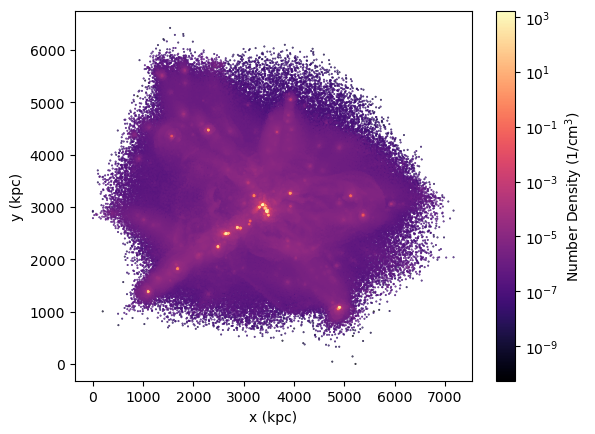

In [95]:
ind = np.argsort(nH)

plt.scatter(x[ind], y[ind], c = nH[ind], s=0.2, norm=cl.LogNorm(), cmap = 'magma')
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.colorbar(label = r'Number Density (1/cm$^3$)')
# BP Plotting the number density of gas throughout the galaxy.

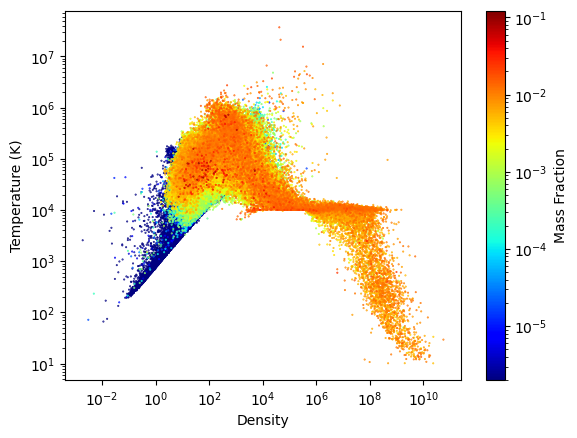

In [96]:
ind = np.argsort(mass_frac)

plt.scatter(dens[ind], temp[ind], c = mass_frac[ind], s=0.2, norm=cl.LogNorm(), cmap='jet')
plt.xlabel('Density')
plt.ylabel('Temperature (K)')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label = 'Mass Fraction')
#plt.title('

# BP Plotting the phase diagram (density temperature) number density of all the gas particles.

In [97]:
scale = 10
stars = part['star']

stars_x = stars['position'][::scale, 0] * u.kpc
stars_y = stars['position'][::scale, 1] * u.kpc
stars_z = stars['position'][::scale, 2] * u.kpc
# Stellar positions

stars_x = stars_x - normx
stars_y = stars_y - normy
stars_z = stars_z - normz
# Normalize to gas position

stars_mass = stars['mass'][::scale] * u.Msun

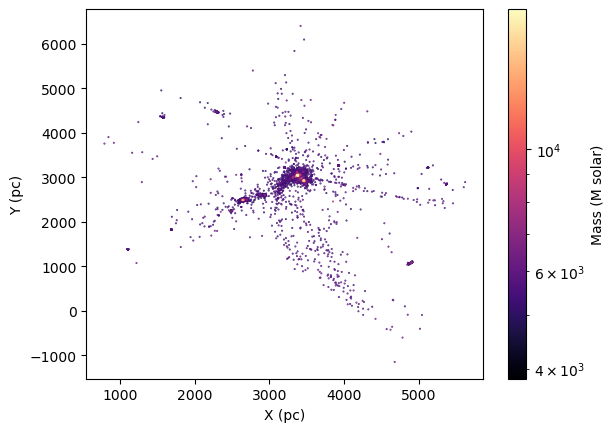

In [98]:
ind = np.argsort(stars_mass)

plt.scatter(stars_x[ind], stars_y[ind], c = stars_mass[ind], s=0.2, norm=cl.LogNorm(), cmap = 'magma')
plt.xlabel('X (pc)')
plt.ylabel('Y (pc)')
plt.colorbar(label = 'Mass (M solar)')
# BP Plotting the location of all the stars in the galaxy colored by mass.

In [99]:
plt.scatter(x, y, c = 'steelblue', s=1)
plt.scatter(stars_x, stars_y, c = 'goldenrod', s=1)
plt.xlabel('X (pc)')
plt.ylabel('Y (pc)')
#plt.colorbar(label = 'Mass (M solar)')
# BP Plotting the location of all the stars in the galaxy colored by mass.

Text(0, 0.5, 'Y (pc)')

# Running Cloudy Grids

In order to calculate the emission at 

### Assume optically thin CGM. Run in 2D grid

In [358]:
scale = 1

x = gas_loc[::scale, 0]
y = gas_loc[::scale, 1]
z = gas_loc[::scale, 2]

nH = part['gas'].prop('number.density')[::scale] / (u.cm**3)
gas_loc_plot = gas_loc[::scale, :2]

In [359]:
n = 5000
gridx = np.linspace(x.min(), x.max(), n+1)
gridy = np.linspace(y.min(), y.max(), n+1)

In [360]:
nH_sum, _, _ = stats.binned_statistic_dd(gas_loc_plot, nH, bins=[gridx, gridy], statistic='sum')
nH_sum = np.nan_to_num(nH_sum, nan=1e-9)
nH_sum[nH_sum == 0] = 1e-9

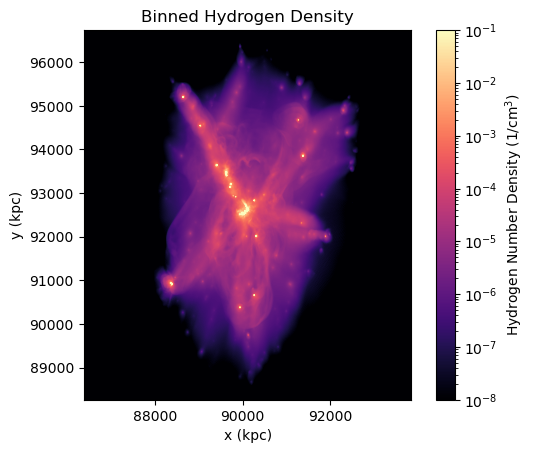

In [361]:
plt.imshow(nH_sum, norm = LogNorm(vmin = 1e-8, vmax = 1e-1), cmap = 'magma', extent = [x.min(), x.max(), y.min(), y.max()])
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.colorbar(label = r'Hydrogen Number Density (1/cm$^3$)')
plt.title('Binned Hydrogen Density')
plt.savefig('Hydrogen_Column_Density_Binned.png', dpi=500)

In [324]:
temp_plot = gas_temp[::scale]
temp_avg, _, _ = stats.binned_statistic_dd(gas_loc_plot, temp_plot, bins=[gridx, gridy], statistic='mean')
temp_avg = np.nan_to_num(temp_avg, nan=1e0)
temp_avg[temp_avg == 0] = 1e0

In [362]:
plt.imshow(temp_avg, cmap='hot', norm = LogNorm(vmin = 2e1, vmax = 2e5), extent = [x.min(), x.max(), y.min(), y.max()])
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.colorbar(label = r'Temperature (K)')
plt.title('Binned Gas Temperature')
plt.savefig('Temperature_Binned.png', dpi=500)

In [330]:
metallicity_fe = part['gas'].prop('metallicity.fe')[::scale]
fe_avg, _, _ = stats.binned_statistic_dd(gas_loc_plot, metallicity_fe, bins=[gridx, gridy], statistic='mean')
fe_avg = np.nan_to_num(fe_avg, nan=1e0)
fe_avg[fe_avg == 0] = 1e0

In [363]:
plt.imshow(fe_avg, cmap='coolwarm', norm=TwoSlopeNorm(vmin=-3.5, vcenter=0, vmax=1), extent = [x.min(), x.max(), y.min(), y.max()])
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.colorbar(label = r'[Fe/H]')
plt.title('Binned Gas Metallicity')
plt.savefig('Metallicity_Binned.png', dpi=500)

In [ ]:
title example input
hden 5 # log of hydrogen density, cmË†-3
blackbody 5e4 K # spectral shape is a 50000K blackbody
# intensity of blackbody is set with
# ionization parameter so starting radius is not needed
ionization parameter -2

In [ ]:
# Start by ignoring contributions from stars

In [ ]:
# Open geometry